## Report


##### Import the libraries
+ import numpy as np 
+ import pandas as pd
+ import matplotlib.pyplot as plt
+ import seaborn as sns
+ import tensorflow
+ from tensorflow import keras
+ from keras.models import  Sequential
+ from keras.layers import Dense, Dropout
+ from sklearn.preprocessing import StandardScaler
+ from sklearn.metrics import accuracy_score
+ from mlxtend.plotting import plot_decision_regions


#### Loading the dataset
+ Check the dataset
+ Check the info of data


#### Check the  spead of datapoint using vizualization

#### Performing train test split and Building MLP
+ Identify the Input and Output
+ Segregate the data into train and test part
+ perform preprocessing step
+ perform fit transform on train data and transform on test data


#### Important Steps in MLP
##### Create the Architecture using Sequencial
+ Crete the model 
+ specify the no of nurons and activation function like relu, sigmoid and tanh
+ Specify the kernel_initializer = random_uniform, he_uniform, he_normal, Xavier, Glorot  
+ Specify the input dimension

##### Model Compilation 
+ Specify the Optimizer like gd, sgd, mini batch sgd
+ loss function:
  + For Regression: MSE, MAE, Huber loss
  + For Classification: Binary cross entropy, Categorical cross entropy
+ Specify Metrics as accuracy

##### Training the model
+ fit the X_train_trans and y_train in the model means leaning the patterns, relationship between input and output
+ Specify the batch size
+ specify the epochs and validation_split

##### MLP Evaluation and Plotting decision surfaces
+ check the prediction of X_test_trans
+ check the accuracy score
+ Try to compair the loss and val_loss using vizualization so can understand the underfitting and overfitting
+ plot the decision surface of X_train_trans, y_train
+ plot the decision surface of X_test_trans, y_test

Importing Requisite Libraries

In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from IPython.core.interactiveshell import InteractiveShell 
InteractiveShell.ast_node_interactivity = 'all'

import warnings
warnings.filterwarnings('ignore')

%config InlineBackend.figure_format='retina'

In [178]:
import tensorflow
from tensorflow import keras
from keras.models import  Sequential
from keras.layers import Dense, Dropout


Loading the dataset

In [3]:
df = pd.read_csv(r"E:\Excel_files\Deep Learning\demo_data\8.twospirals.csv", header = None)

In [180]:
df.head()

,0,1,2
0,-2.543456,-10.816358,0
1,9.434466,-2.572000,0
2,3.368646,-10.194671,0
3,1.341407,-4.204140,0
4,9.547758,-2.220580,0


In [181]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       2000 non-null   float64
 1   1       2000 non-null   float64
 2   2       2000 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 47.0 KB


Plotting the datapoints to identify shape

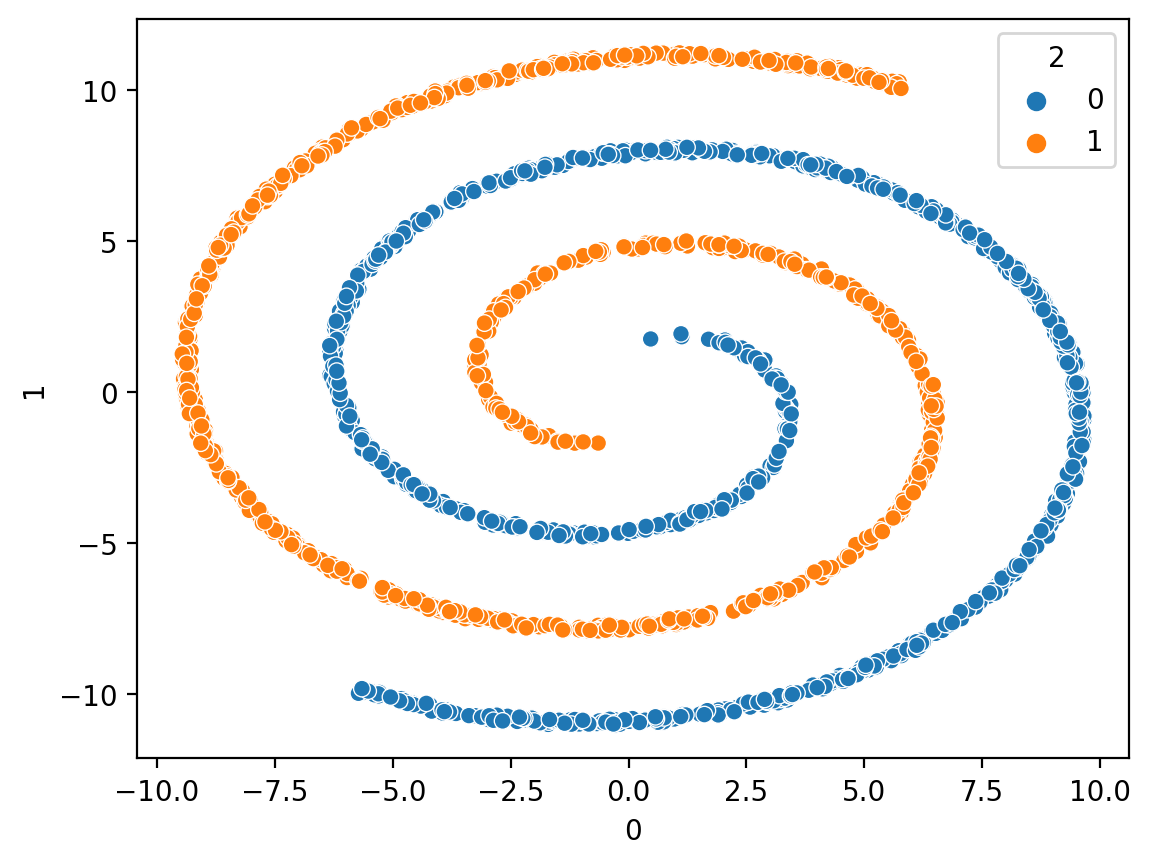

In [182]:
sns.scatterplot(x = 0,y=1, hue = 2, data = df);

Performing train test split and Building MLP

In [183]:
X = df[[0,1]]
y=df[2]

In [184]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2)

In [185]:
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
X_train_trans=std.fit_transform(X_train)

In [186]:
X_test_trans = std.transform(X_test)

In [187]:
model = Sequential()
model.add(Dense(10,activation='relu', kernel_initializer ="he_uniform",input_dim = 2))
#model.add(Dropout(0.2))
model.add(Dense(8,activation='relu', kernel_initializer ="he_uniform"))
#model.add(Dropout(0.2))
model.add(Dense(7,activation='relu', kernel_initializer ="he_uniform"))
model.add(Dense(6,activation='relu', kernel_initializer ="he_uniform"))
model.add(Dense(5,activation='relu', kernel_initializer = "he_uniform"))
model.add(Dense(3,activation='relu', kernel_initializer = "he_uniform"))
model.add(Dense(2,activation='relu', kernel_initializer = "he_uniform"))
model.add(Dense(1,activation='sigmoid'))

In [188]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_46 (Dense)            (None, 10)                30        
                                                                 
 dense_47 (Dense)            (None, 8)                 88        
                                                                 
 dense_48 (Dense)            (None, 7)                 63        
                                                                 
 dense_49 (Dense)            (None, 6)                 48        
                                                                 
 dense_50 (Dense)            (None, 5)                 35        
                                                                 
 dense_51 (Dense)            (None, 3)                 18        
                                                                 
 dense_52 (Dense)            (None, 2)                

Model Compilation and Training

In [189]:
model.compile(optimizer='Adam',loss = 'binary_crossentropy',metrics = ['accuracy'])

In [190]:
history = model.fit(X_train_trans,y_train,epochs = 300 ,validation_split = 0.2 )

Epoch 1/300
40/40 [==============================] - 2s 7ms/step - loss: 0.7451 - accuracy: 0.4164 - val_loss: 0.6911 - val_accuracy: 0.4406
Epoch 2/300
40/40 [==============================] - 0s 3ms/step - loss: 0.6876 - accuracy: 0.4805 - val_loss: 0.6580 - val_accuracy: 0.6125
Epoch 3/300
40/40 [==============================] - 0s 3ms/step - loss: 0.6729 - accuracy: 0.5984 - val_loss: 0.6427 - val_accuracy: 0.6469
Epoch 4/300
40/40 [==============================] - 0s 3ms/step - loss: 0.6643 - accuracy: 0.6273 - val_loss: 0.6268 - val_accuracy: 0.6750
Epoch 5/300
40/40 [==============================] - 0s 3ms/step - loss: 0.6595 - accuracy: 0.6320 - val_loss: 0.6216 - val_accuracy: 0.6875
Epoch 6/300
40/40 [==============================] - 0s 3ms/step - loss: 0.6557 - accuracy: 0.6375 - val_loss: 0.6196 - val_accuracy: 0.6812
Epoch 7/300
40/40 [==============================] - 0s 2ms/step - loss: 0.6526 - accuracy: 0.6391 - val_loss: 0.6148 - val_accuracy: 0.6844
Epoch 8/300
4

MLP Evaluation and Plotting decision surfaces

In [191]:
Y_cap = model.predict(X_test_trans)

13/13 [==============================] - 0s 970us/step


In [192]:
Y_cap_f = np.where(Y_cap>0.5,1,0)

In [193]:
Y_cap_f

array([[1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
    

In [194]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,Y_cap_f)

1.0

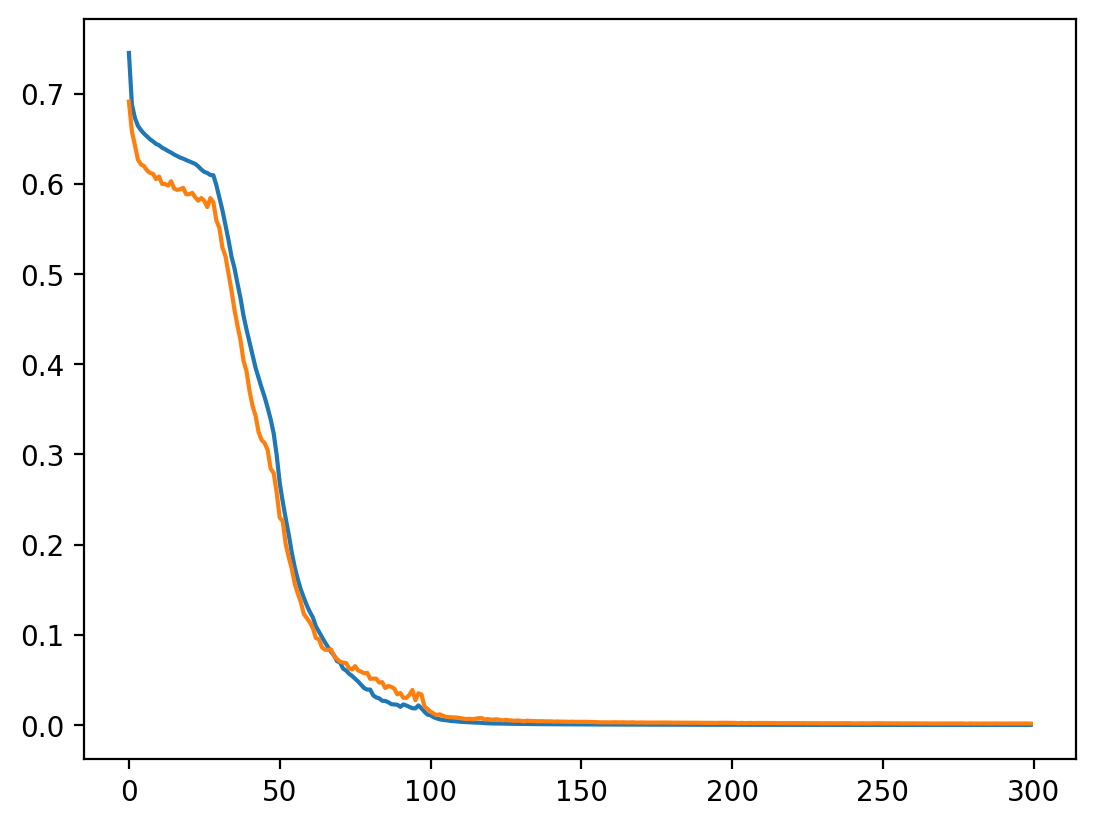

In [195]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss']);

In [4]:
# !pip install mlxtend --upgrade

In [197]:
from mlxtend.plotting import plot_decision_regions

9600/9600 [==============================] - 11s 1ms/step


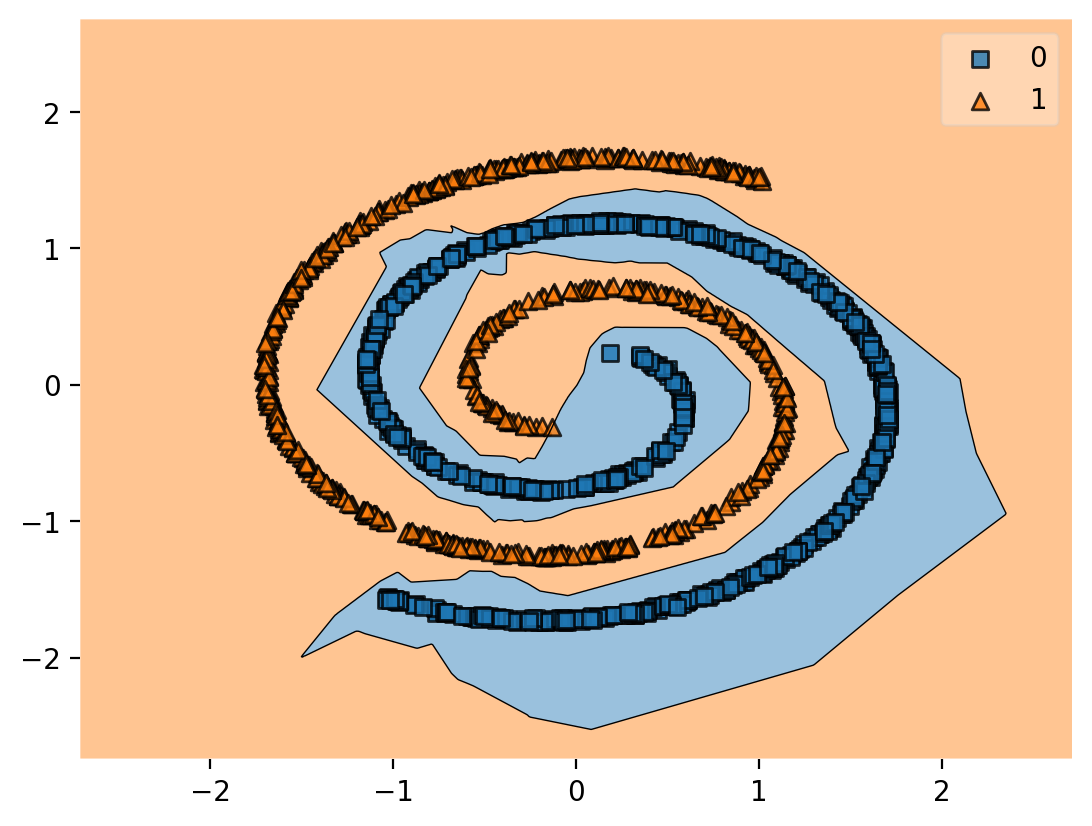

In [198]:
plot_decision_regions(X_train_trans, y_train.values.astype(int), clf = model);

9600/9600 [==============================] - 11s 1ms/step


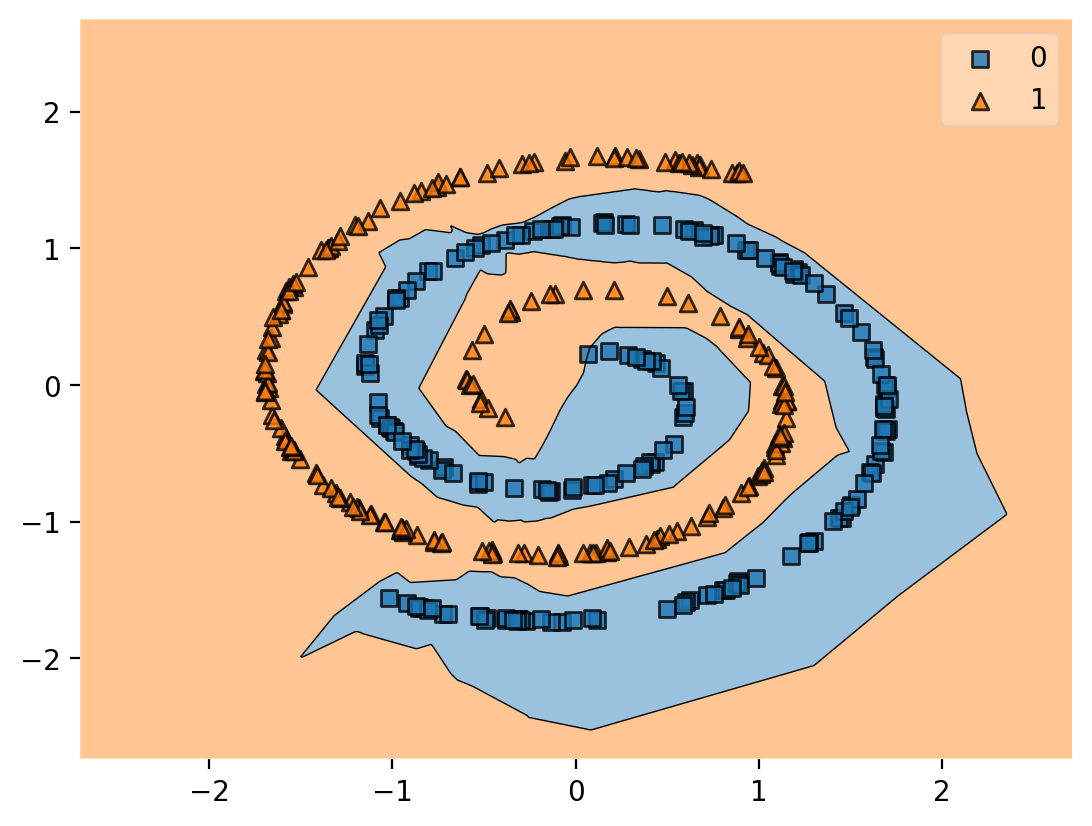

In [199]:
plot_decision_regions(X_test_trans, y_test.values.astype(int), clf = model);

### Accuracy : 100%